In [1]:
import os

In [2]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot

In [3]:
# DO THE PMDARIMA!

# https://alkaline-ml.com/pmdarima/auto_examples/arima/example_add_new_samples.html#sphx-glr-auto-examples-arima-example-add-new-samples-py


# check this too
# https://stackoverflow.com/questions/76297649/auto-arima-in-python-results-in-poor-fitting-prediction-of-trend

# https://mlpills.dev/time-series/how-to-train-a-sarima-model-step-by-step/
# https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide
# https://www.linkedin.com/pulse/time-series-episode-1-how-select-correct-sarima-vasilis-kalyvas-jqcjf

# https://robjhyndman.com/hyndsight/seasonal-periods/



# https://alkaline-ml.com/2019-12-18-pmdarima-1-5-2/

In [4]:
d = '../data/data_folds/'
os.listdir(d)

['data_test_0.xlsx',
 'data_test_1.xlsx',
 'data_test_2.xlsx',
 'data_test_3.xlsx',
 'data_test_4.xlsx',
 'data_test_5.xlsx',
 'data_test_6.xlsx',
 'data_test_7.xlsx',
 'data_test_8.xlsx',
 'data_test_9.xlsx',
 'data_train_0.xlsx',
 'data_train_1.xlsx',
 'data_train_2.xlsx',
 'data_train_3.xlsx',
 'data_train_4.xlsx',
 'data_train_5.xlsx',
 'data_train_6.xlsx',
 'data_train_7.xlsx',
 'data_train_8.xlsx',
 'data_train_9.xlsx']

In [5]:
os.chdir('../')
os.listdir('./')

['.env',
 '.git',
 '.gitignore',
 '.idea',
 'data',
 'LICENSE',
 'macro',
 'notebooks',
 'pp.png',
 'pyproject.toml',
 'r',
 'README.md',
 'setup.cfg']

In [6]:
dd = './data/data_folds/data_{0}_{1}.xlsx'
dd

'./data/data_folds/data_{0}_{1}.xlsx'

In [7]:
j = 4
target = "AAA"

In [8]:
role = 'train'
data_train = pandas.read_excel(dd.format(role, j))
data_train = data_train.rename(columns={'Unnamed: 0': 'date'})
data_train['date'] = pandas.to_datetime(data_train['date'])
data_train = data_train.set_index('date')
data_train.head(5)

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,AWHAERT__p101x12_div_pct,TLT_aggmean_pct
date,,,,,,,,,
2011-12-01 00:00:00+00:00,39008,3.93,3057860,31.700001,41.599998,5.25,-0.323529,0.264706,0.008371
2012-01-01 00:00:00+00:00,39253,3.85,2882127,31.900000,41.799999,5.23,0.000000,0.558824,-0.007132
2012-02-01 00:00:00+00:00,39466,3.85,3151721,31.900000,41.799999,5.14,-0.343137,0.215686,-0.012369
2012-03-01 00:00:00+00:00,39590,3.99,3104707,31.900000,41.599998,5.23,-0.343137,0.215686,-0.029696
2012-04-01 00:00:00+00:00,39744,3.96,3020817,31.600000,41.700001,5.19,-0.823529,-0.098039,0.017544


In [9]:
role = 'test'
data_test = pandas.read_excel(dd.format(role, j))
data_test = data_test.rename(columns={'Unnamed: 0': 'date'})
data_test['date'] = pandas.to_datetime(data_test['date'])
data_test = data_test.set_index('date')
data_test.head(5)

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,AWHAERT__p101x12_div_pct,TLT_aggmean_pct
date,,,,,,,,,
2015-04-01 00:00:00+00:00,41248,3.52,3058363,31.299999,41.799999,4.48,-0.264706,0.313725,0.007056
2015-05-01 00:00:00+00:00,41290,3.98,2997103,31.400000,41.799999,4.89,0.000000,0.431373,-0.065105
2015-06-01 00:00:00+00:00,41288,4.19,2957215,31.299999,41.799999,5.13,-0.578431,0.000000,-0.027980
2015-07-01 00:00:00+00:00,41355,4.15,2982621,31.400000,41.799999,5.20,0.000000,0.578431,0.010486
2015-08-01 00:00:00+00:00,41420,4.04,2930455,31.500000,41.799999,5.19,-0.039216,0.539216,0.040148


C:\Users\Edward\AppData\Local\Temp\ipykernel_10004\1495126972.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


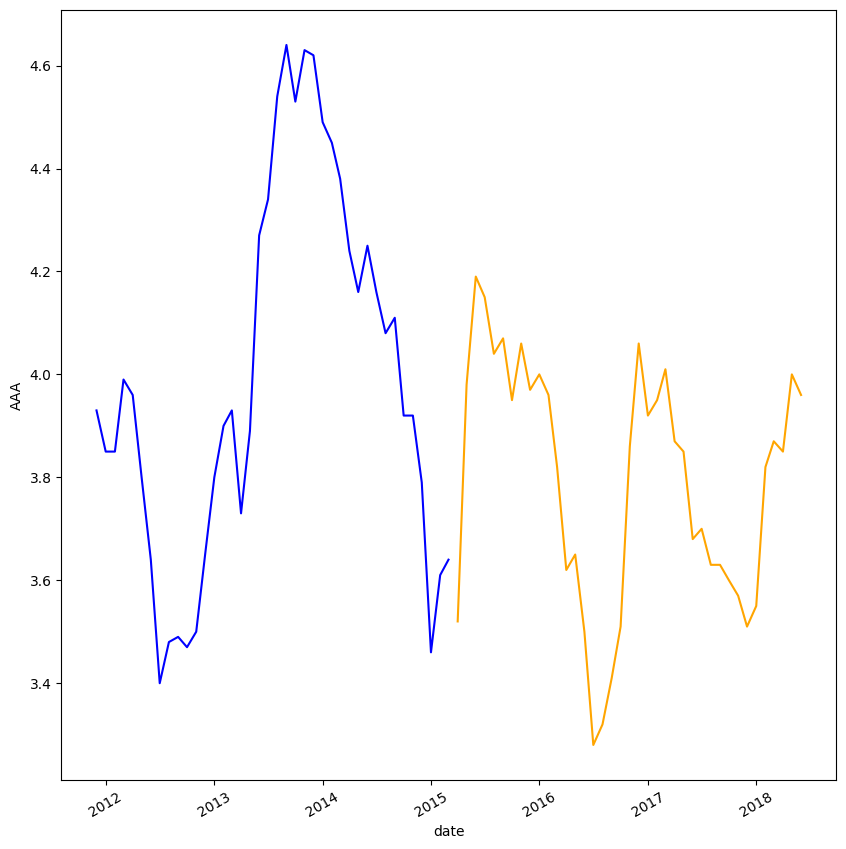

In [10]:
fig, ax = pyplot.subplots(figsize=(10, 10))
seaborn.lineplot(
    x=data_train.index, 
    y=data_train[target],
    color='blue', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index, 
    y=data_test[target],
    color='orange', 
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

In [11]:
import pmdarima

In [12]:

result = data_train[target].copy()

result = result.pct_change()
result = (result + 1).apply(func=numpy.log)
mask_positive_inf = result == numpy.inf
mask_negative_inf = result == -numpy.inf
impute_max = result[~mask_positive_inf].max()
impute_min = result[~mask_negative_inf].min()
result[mask_positive_inf] = impute_max
result[mask_negative_inf] = impute_min
y = result.iloc[1:].copy()
y

date
2012-01-01 00:00:00+00:00   -0.020566
2012-02-01 00:00:00+00:00    0.000000
2012-03-01 00:00:00+00:00    0.035718
2012-04-01 00:00:00+00:00   -0.007547
2012-05-01 00:00:00+00:00   -0.041243
2012-06-01 00:00:00+00:00   -0.043017
2012-07-01 00:00:00+00:00   -0.068208
2012-08-01 00:00:00+00:00    0.023257
2012-09-01 00:00:00+00:00    0.002869
2012-10-01 00:00:00+00:00   -0.005747
2012-11-01 00:00:00+00:00    0.008608
2012-12-01 00:00:00+00:00    0.041964
2013-01-01 00:00:00+00:00    0.040274
2013-02-01 00:00:00+00:00    0.025976
2013-03-01 00:00:00+00:00    0.007663
2013-04-01 00:00:00+00:00   -0.052231
2013-05-01 00:00:00+00:00    0.042001
2013-06-01 00:00:00+00:00    0.093205
2013-07-01 00:00:00+00:00    0.016261
2013-08-01 00:00:00+00:00    0.045053
2013-09-01 00:00:00+00:00    0.021787
2013-10-01 00:00:00+00:00   -0.023992
2013-11-01 00:00:00+00:00    0.021835
2013-12-01 00:00:00+00:00   -0.002162
2014-01-01 00:00:00+00:00   -0.028542
2014-02-01 00:00:00+00:00   -0.008949
2014-03

In [13]:
import statsmodels

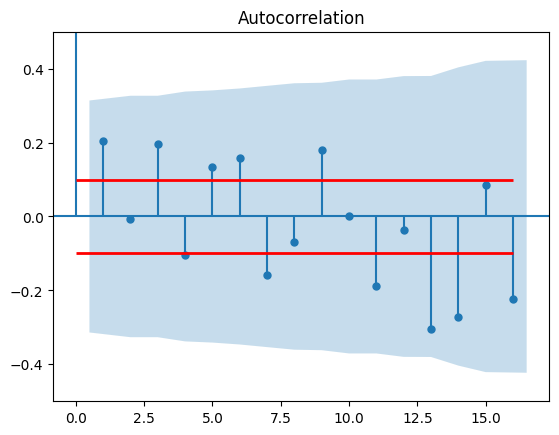

In [14]:
fig, ax = pyplot.subplots()
statsmodels.graphics.tsaplots.plot_acf(
    x=y.values,
    ax=ax
)
ax.hlines(y=+0.1, xmin=0, xmax=16, linewidth=2, color='r')
ax.hlines(y=-0.1, xmin=0, xmax=16, linewidth=2, color='r')
ax.set_ylim(-0.5, +0.5)
print()

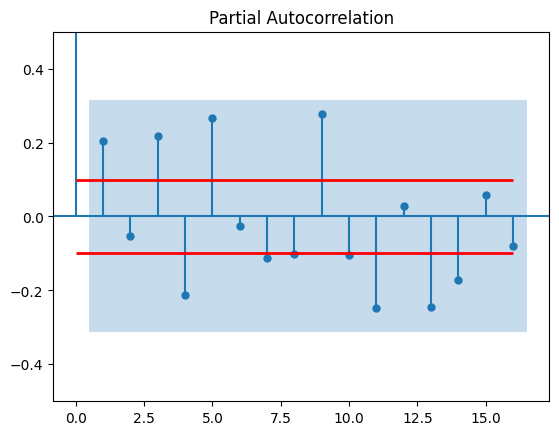

In [15]:
fig, ax = pyplot.subplots()
statsmodels.graphics.tsaplots.plot_pacf(
    x=y.values,
    ax=ax,
)
ax.hlines(y=+0.1, xmin=0, xmax=16, linewidth=2, color='r')
ax.hlines(y=-0.1, xmin=0, xmax=16, linewidth=2, color='r')
ax.set_ylim(-0.5, +0.5)
print()

<Axes: xlabel='date'>

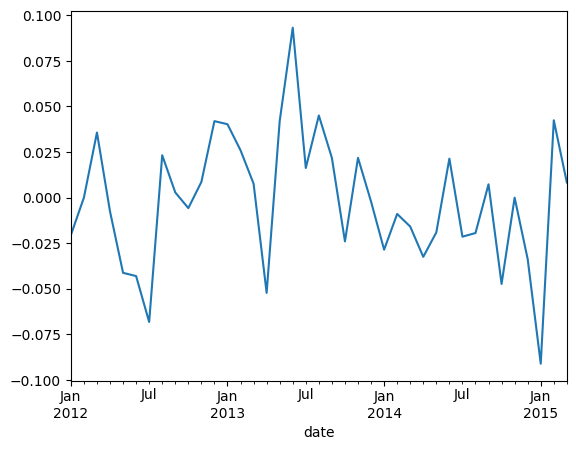

In [16]:
y.plot()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

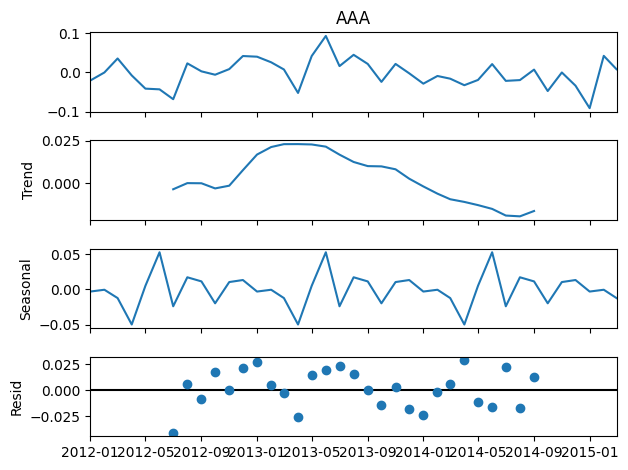

In [18]:
result = seasonal_decompose(y, model='additive')
result.plot()
print()

In [42]:
import time

In [394]:
run_time = time.time()
max_window = 6
method = 'bfgs' # lbfgs newton nm bfgs powell cg ncg basinhopping
maxiter = 50 # 50
"""
model = pmdarima.auto_arima(y.values, start_p=0, start_q=0,
                            max_order=max_window, seasonal=False,
                            stepwise=True, suppress_warnings=False,
                            error_action='warn')
"""
# """
model = pmdarima.arima.ARIMA(order=(1, 0, 1), trend=None, with_intercept=False,
                             suppress_warnings=False,
                             method=method)   
# """
"""
model = pmdarima.arima.ARIMA(order=(1, 0, 1), seasonal_order=(1, 0, 1, 12), 
                             trend=None, with_intercept=False,
                             suppress_warnings=False,
                             method='lbfgs')   # lbfgs
"""
model.fit(y.values)
# order=(), seasonal=False, trend=None, with_intercept=True
run_time = time.time() - run_time

In [395]:
run_time

0.05997967720031738

In [397]:
del xx
def xx(method, maxiter):
    model = pmdarima.arima.ARIMA(order=(1, 0, 1), trend=None, with_intercept=False,
                                 suppress_warnings=False,
                                 method=method, maxiter=maxiter)   # lbfgs newton nm bfgs powell cg ncg basinhopping
    # """
    """
    model = pmdarima.arima.ARIMA(order=(1, 0, 1), seasonal_order=(1, 0, 1, 12), 
                                 trend=None, with_intercept=False,
                                 suppress_warnings=False,
                                 method='lbfgs')   # lbfgs
    """
    model.fit(y.values)

In [398]:
%timeit xx(method='lbfgs', maxiter=50)

125 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [399]:
%timeit xx(method='lbfgs', maxiter=10)

C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

39.8 ms ± 6.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

In [400]:
%timeit xx(method='bfgs', maxiter=50)

48.7 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [401]:
%timeit xx(method='bfgs', maxiter=10)

C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

33.7 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [402]:
%timeit xx(method='nm', maxiter=50)

C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

37.5 ms ± 3.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [403]:
%timeit xx(method='nm', maxiter=10)

C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

12.5 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [318]:
prediction = model.predict_in_sample(dynamic=False)
prediction

array([ 0.        , -0.00505997,  0.00399627,  0.00832199, -0.00962167,
       -0.00666794, -0.01026356, -0.01706153,  0.02417237, -0.02044919,
        0.01613043, -0.01127935,  0.02647814, -0.00781607,  0.0188772 ,
       -0.01365247, -0.01057834,  0.02496225,  0.01302975, -0.00545645,
        0.02413108, -0.01307098,  0.00210858,  0.00866411, -0.00678048,
       -0.004208  ,  0.00066915, -0.00879473, -0.00488051,  0.00032549,
        0.01087239, -0.01713428,  0.00891357, -0.00549261, -0.01443673,
        0.0133329 , -0.02737634, -0.01389245,  0.02971157])

In [319]:
y.shape, prediction.shape

((39,), (39,))

In [320]:
data_train[target].shape

(40,)

In [321]:
numpy.concatenate(([numpy.nan], prediction)).shape

(40,)

In [322]:
result_first = pandas.Series(data=numpy.concatenate(([numpy.nan], prediction)), index=data_train[target].index)
result_first

date
2011-12-01 00:00:00+00:00         NaN
2012-01-01 00:00:00+00:00    0.000000
2012-02-01 00:00:00+00:00   -0.005060
2012-03-01 00:00:00+00:00    0.003996
2012-04-01 00:00:00+00:00    0.008322
2012-05-01 00:00:00+00:00   -0.009622
2012-06-01 00:00:00+00:00   -0.006668
2012-07-01 00:00:00+00:00   -0.010264
2012-08-01 00:00:00+00:00   -0.017062
2012-09-01 00:00:00+00:00    0.024172
2012-10-01 00:00:00+00:00   -0.020449
2012-11-01 00:00:00+00:00    0.016130
2012-12-01 00:00:00+00:00   -0.011279
2013-01-01 00:00:00+00:00    0.026478
2013-02-01 00:00:00+00:00   -0.007816
2013-03-01 00:00:00+00:00    0.018877
2013-04-01 00:00:00+00:00   -0.013652
2013-05-01 00:00:00+00:00   -0.010578
2013-06-01 00:00:00+00:00    0.024962
2013-07-01 00:00:00+00:00    0.013030
2013-08-01 00:00:00+00:00   -0.005456
2013-09-01 00:00:00+00:00    0.024131
2013-10-01 00:00:00+00:00   -0.013071
2013-11-01 00:00:00+00:00    0.002109
2013-12-01 00:00:00+00:00    0.008664
2014-01-01 00:00:00+00:00   -0.006780
2014-02

In [323]:
result_first.shape

(40,)

In [324]:
y_project_first_series = data_train[target].copy()

result = data_test[target].copy()

result_ = pandas.concat((y_project_first_series, result), ignore_index=False)
result_

date
2011-12-01 00:00:00+00:00    3.93
2012-01-01 00:00:00+00:00    3.85
2012-02-01 00:00:00+00:00    3.85
2012-03-01 00:00:00+00:00    3.99
2012-04-01 00:00:00+00:00    3.96
                             ... 
2018-02-01 00:00:00+00:00    3.82
2018-03-01 00:00:00+00:00    3.87
2018-04-01 00:00:00+00:00    3.85
2018-05-01 00:00:00+00:00    4.00
2018-06-01 00:00:00+00:00    3.96
Name: AAA, Length: 79, dtype: float64

In [325]:
data_test.shape

(39, 9)

In [326]:
import copy

In [417]:
method = 'nm' # lbfgs newton nm bfgs powell cg ncg basinhopping
maxiter = 50
# """
model = pmdarima.arima.ARIMA(order=(1, 0, 1), trend=None, with_intercept=False,
                             suppress_warnings=False,
                             method=method, maxiter=maxiter)   
# """
"""
model = pmdarima.arima.ARIMA(order=(1, 0, 1), seasonal_order=(1, 0, 1, 12), 
                             trend=None, with_intercept=False,
                             suppress_warnings=False,
                             method='lbfgs')   # lbfgs
"""
model.fit(y.values)

ARIMA(method='nm', order=(1, 0, 1), with_intercept=False)

In [366]:
def zz():
    result_ = pandas.concat((y_project_first_series, result), ignore_index=False)
    result_ = result_.pct_change()
    result_ = (result_ + 1).apply(func=numpy.log)
    mask_positive_inf = result_ == numpy.inf
    mask_negative_inf = result_ == -numpy.inf
    result_[mask_positive_inf] = impute_max
    result_[mask_negative_inf] = impute_min
    appendix = result_.iloc[y_project_first_series.shape[0]:]
    model_copy = copy.deepcopy(model)
    forecasted = []
    for j in range(appendix.shape[0]):
        # model_copy.update(appendix.iloc[[j]].values)
        y_hat_i = model_copy.predict(n_periods=1)[-1]
        forecasted.append(y_hat_i)

In [418]:
del yy
def yy():
    result_ = pandas.concat((y_project_first_series, result), ignore_index=False)
    result_ = result_.pct_change()
    result_ = (result_ + 1).apply(func=numpy.log)
    mask_positive_inf = result_ == numpy.inf
    mask_negative_inf = result_ == -numpy.inf
    result_[mask_positive_inf] = impute_max
    result_[mask_negative_inf] = impute_min
    appendix = result_.iloc[y_project_first_series.shape[0]:]
    model_copy = copy.deepcopy(model)
    forecasted = []
    for j in range(appendix.shape[0]):
        model_copy.update(appendix.iloc[[j]].values)
        y_hat_i = model_copy.predict(n_periods=1)[-1]
        forecasted.append(y_hat_i)

In [412]:
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning, ConvergenceWarning
warnings.simplefilter('ignore', InterpolationWarning)
warnings.simplefilter('ignore', ConvergenceWarning)

In [416]:
%timeit yy()  # nm maxiter=10  # 380 ms / 370 ms / 360 ms / 390 ms

389 ms ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [422]:
%timeit yy()  # nm  # 410 ms / 360 ms / 340 ms / 500 ms

495 ms ± 60.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [383]:
%timeit yy()  # lbfgs  # 900 ms / 830 ms / 830 ms / 810 ms

C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

812 ms ± 98.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [389]:
%timeit yy()  # bfgs  # 1140 ms / 810 ms / 900 ms / 840 ms

C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

868 ms ± 96.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\TET\env\macro_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [369]:
%timeit zz()  # no update

55.8 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [365]:

run_time = time.time()
result_ = result_.pct_change()
result_ = (result_ + 1).apply(func=numpy.log)
mask_positive_inf = result_ == numpy.inf
mask_negative_inf = result_ == -numpy.inf
result_[mask_positive_inf] = impute_max
result_[mask_negative_inf] = impute_min
appendix = result_.iloc[y_project_first_series.shape[0]:]
model_copy = copy.deepcopy(model)
forecasted = []
for j in range(appendix.shape[0]):
    model_copy.update(appendix.iloc[[j]].values)
    y_hat_i = model_copy.predict(n_periods=1)[-1]
    forecasted.append(y_hat_i)
run_time = time.time() - run_time
len(forecasted)

C:\Users\Edward\AppData\Local\Temp\ipykernel_10004\2175483574.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  result_ = result_.pct_change()


TypeError: statsmodels.tsa.statespace.mlemodel.MLEModel.fit() got multiple values for keyword argument 'method'

In [354]:
run_time

0.8440771102905273

In [328]:
pandas.Series(forecasted)

0     0.007510
1     0.044502
2    -0.019604
3     0.013061
4    -0.023423
5     0.023797
6    -0.034159
7     0.039892
8    -0.048883
9     0.043056
10   -0.041213
11    0.023521
12   -0.036313
13    0.030501
14   -0.035967
15    0.013584
16   -0.010016
17    0.014056
18   -0.004775
19    0.027520
20   -0.012085
21    0.002140
22   -0.002252
23    0.001101
24   -0.009131
25    0.004944
26   -0.019168
27    0.014277
28   -0.012683
29    0.015630
30   -0.005069
31    0.013269
32   -0.014453
33    0.013198
34    0.001852
35   -0.000865
36   -0.001768
37    0.004553
38   -0.006825
dtype: float64

In [329]:
result_second = pandas.Series(data=forecasted, index=result.index)
result_second

date
2015-04-01 00:00:00+00:00    0.007510
2015-05-01 00:00:00+00:00    0.044502
2015-06-01 00:00:00+00:00   -0.019604
2015-07-01 00:00:00+00:00    0.013061
2015-08-01 00:00:00+00:00   -0.023423
2015-09-01 00:00:00+00:00    0.023797
2015-10-01 00:00:00+00:00   -0.034159
2015-11-01 00:00:00+00:00    0.039892
2015-12-01 00:00:00+00:00   -0.048883
2016-01-01 00:00:00+00:00    0.043056
2016-02-01 00:00:00+00:00   -0.041213
2016-03-01 00:00:00+00:00    0.023521
2016-04-01 00:00:00+00:00   -0.036313
2016-05-01 00:00:00+00:00    0.030501
2016-06-01 00:00:00+00:00   -0.035967
2016-07-01 00:00:00+00:00    0.013584
2016-08-01 00:00:00+00:00   -0.010016
2016-09-01 00:00:00+00:00    0.014056
2016-10-01 00:00:00+00:00   -0.004775
2016-11-01 00:00:00+00:00    0.027520
2016-12-01 00:00:00+00:00   -0.012085
2017-01-01 00:00:00+00:00    0.002140
2017-02-01 00:00:00+00:00   -0.002252
2017-03-01 00:00:00+00:00    0.001101
2017-04-01 00:00:00+00:00   -0.009131
2017-05-01 00:00:00+00:00    0.004944
2017-06

In [330]:
model

ARIMA(order=(1, 0, 1), seasonal_order=(1, 0, 1, 12), with_intercept=False)

In [331]:
result_first.shape

(40,)

In [332]:
data_train[target].shape

(40,)

In [333]:
result_first_ = data_train[target].values[:-1] * result_first.apply(func=numpy.exp).iloc[1:]
result_first_

date
2012-01-01 00:00:00+00:00    3.930000
2012-02-01 00:00:00+00:00    3.830568
2012-03-01 00:00:00+00:00    3.865416
2012-04-01 00:00:00+00:00    4.023343
2012-05-01 00:00:00+00:00    3.922081
2012-06-01 00:00:00+00:00    3.774746
2012-07-01 00:00:00+00:00    3.602832
2012-08-01 00:00:00+00:00    3.342483
2012-09-01 00:00:00+00:00    3.565145
2012-10-01 00:00:00+00:00    3.419357
2012-11-01 00:00:00+00:00    3.526426
2012-12-01 00:00:00+00:00    3.460744
2013-01-01 00:00:00+00:00    3.747936
2013-02-01 00:00:00+00:00    3.770415
2013-03-01 00:00:00+00:00    3.974320
2013-04-01 00:00:00+00:00    3.876710
2013-05-01 00:00:00+00:00    3.690751
2013-06-01 00:00:00+00:00    3.988325
2013-07-01 00:00:00+00:00    4.326001
2013-08-01 00:00:00+00:00    4.316384
2013-09-01 00:00:00+00:00    4.650888
2013-10-01 00:00:00+00:00    4.579745
2013-11-01 00:00:00+00:00    4.539562
2013-12-01 00:00:00+00:00    4.670289
2014-01-01 00:00:00+00:00    4.588780
2014-02-01 00:00:00+00:00    4.471146
2014-03

In [334]:
result_second_ = data_test[target].values[:-1] * result_second.apply(func=numpy.exp).iloc[1:]
result_second_

date
2015-05-01 00:00:00+00:00    3.680184
2015-06-01 00:00:00+00:00    3.902734
2015-07-01 00:00:00+00:00    4.245083
2015-08-01 00:00:00+00:00    4.053924
2015-09-01 00:00:00+00:00    4.137291
2015-10-01 00:00:00+00:00    3.933319
2015-11-01 00:00:00+00:00    4.110758
2015-12-01 00:00:00+00:00    3.866307
2016-01-01 00:00:00+00:00    4.144667
2016-02-01 00:00:00+00:00    3.838500
2016-03-01 00:00:00+00:00    4.054248
2016-04-01 00:00:00+00:00    3.683773
2016-05-01 00:00:00+00:00    3.732114
2016-06-01 00:00:00+00:00    3.521052
2016-07-01 00:00:00+00:00    3.547867
2016-08-01 00:00:00+00:00    3.247310
2016-09-01 00:00:00+00:00    3.366996
2016-10-01 00:00:00+00:00    3.393755
2016-11-01 00:00:00+00:00    3.607935
2016-12-01 00:00:00+00:00    3.813632
2017-01-01 00:00:00+00:00    4.068699
2017-02-01 00:00:00+00:00    3.911182
2017-03-01 00:00:00+00:00    3.954352
2017-04-01 00:00:00+00:00    3.973550
2017-05-01 00:00:00+00:00    3.889179
2017-06-01 00:00:00+00:00    3.776904
2017-07

In [335]:
data_train.head(5)

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,AWHAERT__p101x12_div_pct,TLT_aggmean_pct
date,,,,,,,,,
2011-12-01 00:00:00+00:00,39008,3.93,3057860,31.700001,41.599998,5.25,-0.323529,0.264706,0.008371
2012-01-01 00:00:00+00:00,39253,3.85,2882127,31.900000,41.799999,5.23,0.000000,0.558824,-0.007132
2012-02-01 00:00:00+00:00,39466,3.85,3151721,31.900000,41.799999,5.14,-0.343137,0.215686,-0.012369
2012-03-01 00:00:00+00:00,39590,3.99,3104707,31.900000,41.599998,5.23,-0.343137,0.215686,-0.029696
2012-04-01 00:00:00+00:00,39744,3.96,3020817,31.600000,41.700001,5.19,-0.823529,-0.098039,0.017544


C:\Users\Edward\AppData\Local\Temp\ipykernel_10004\3892044288.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


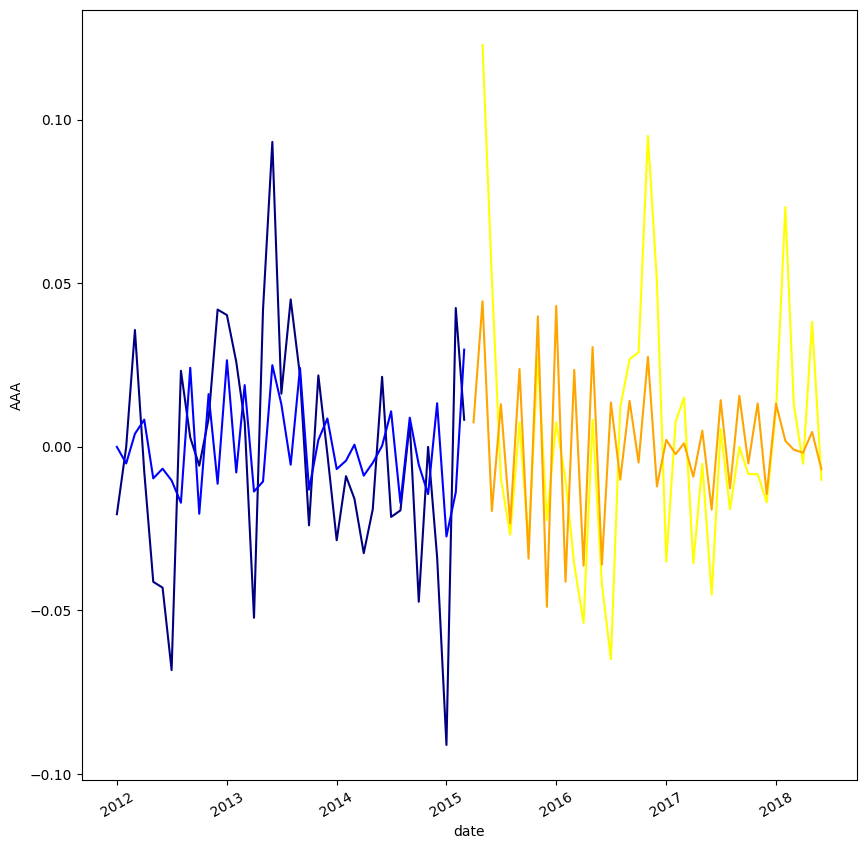

In [336]:
fig, ax = pyplot.subplots(figsize=(10, 10))
seaborn.lineplot(
    x=data_train.index, 
    y=(data_train[target].pct_change() + 1).apply(numpy.log),
    color='navy', 
    ax=ax
)
seaborn.lineplot(
    x=data_train.index, 
    y=result_first,
    color='blue', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index, 
    y=(data_test[target].pct_change() + 1).apply(numpy.log),
    color='yellow', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index, 
    y=result_second,
    color='orange', 
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
# ax.set_ylim([30_000, 50_000])
print()

C:\Users\Edward\AppData\Local\Temp\ipykernel_10004\19145901.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


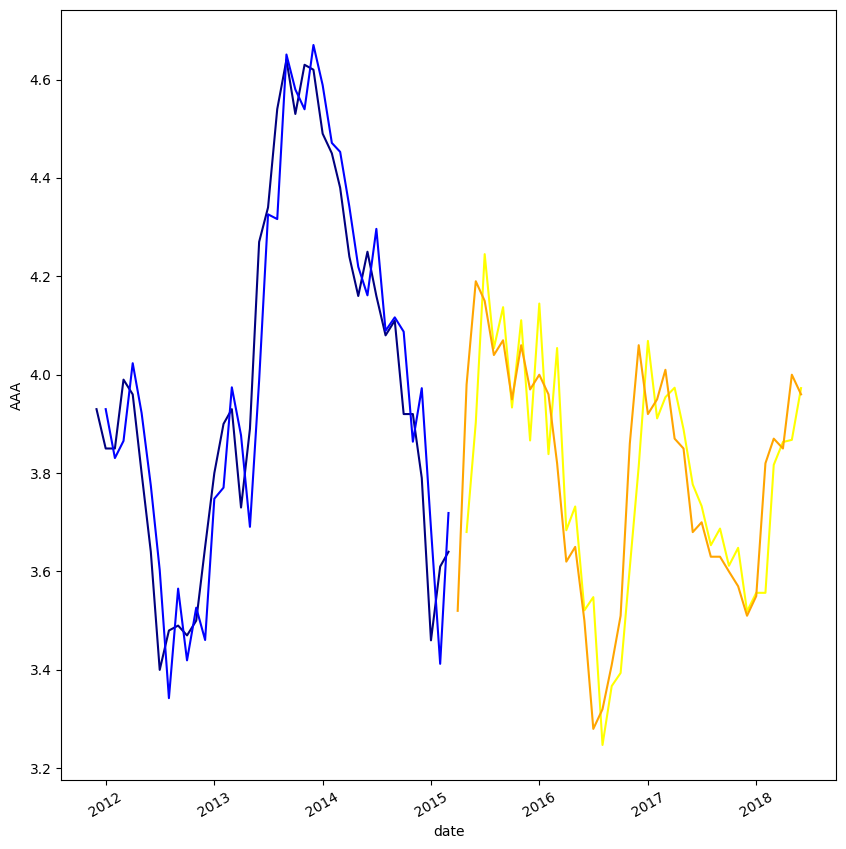

In [337]:
fig, ax = pyplot.subplots(figsize=(10, 10))
seaborn.lineplot(
    x=data_train.index, 
    y=data_train[target],
    color='navy', 
    ax=ax
)
seaborn.lineplot(
    x=data_train.index[1:], 
    y=result_first_,
    color='blue', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index[1:], 
    y=result_second_,
    color='yellow', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index, 
    y=data_test[target],
    color='orange', 
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
# ax.set_ylim([30_000, 50_000])
print()